<a href="https://colab.research.google.com/github/yj2811/Yoga-Pose-Classification/blob/main/Yoga_Pose_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [3]:
seed = 314
tf.random.set_seed(seed)
np.random.seed(seed)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_path = '/content/drive/MyDrive/evolv-fit/yoga pose/Train/'
test_path = '/content/drive/MyDrive/evolv-fit/yoga pose/Test/'

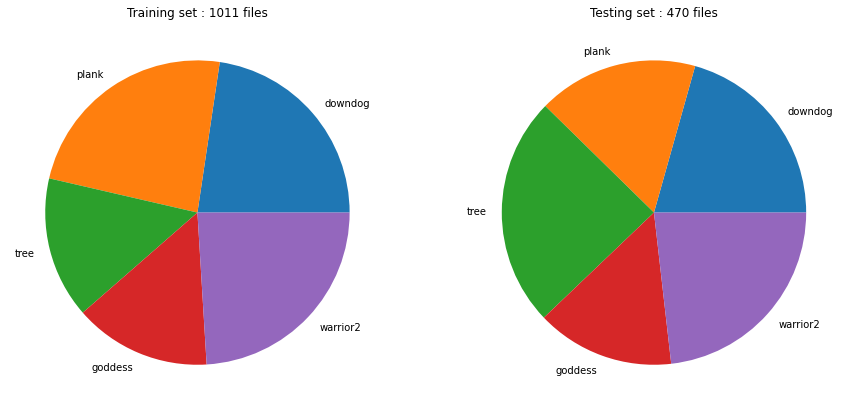

In [8]:
# Visualising the distribution of data

train_distribution = []
test_distribution = []

names_classes = []
# Train
for dir in os.listdir(train_path):
    names_classes.append(dir) 
    n1 = len(os.listdir(train_path+dir+'/')) 
    train_distribution.append(n1) 
    
# Test
for dir in os.listdir(test_path):
   
    n2 = len(os.listdir(test_path+dir+'/')) 
    test_distribution.append(n2) 


plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.pie(train_distribution, labels=names_classes)
plt.title(f'Training set : {sum(train_distribution)} files')
plt.subplot(1,2,2)
plt.pie(test_distribution, labels=names_classes)
plt.title(f'Testing set : {sum(test_distribution)} files')
plt.show()

In [9]:
# Data augmentation

# Using 25% of the Testing set for Validation data
# Augmenting the data to generate more images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataGenerator = ImageDataGenerator(
    shear_range = 0.2, 
    zoom_range = 0.2, 
    rescale = 1/255, 
    horizontal_flip = True 
)

test_dataGenerator = ImageDataGenerator(
    rescale = 1/ 255,
    horizontal_flip = True,
    # Data for validation
    validation_split=0.25, 
)

In [12]:
train_generated = train_dataGenerator.flow_from_directory(
    train_path, 
    batch_size = 16,
    class_mode = 'categorical',
    target_size = (128, 128), 
    shuffle = True,
    seed = 314
)

test_generated = test_dataGenerator.flow_from_directory(
    test_path, 
    batch_size = 16,
    class_mode = 'categorical', 
    target_size = (128,128), 
    shuffle = True,
    seed = seed,
    subset='training', 
)


val_generated = test_dataGenerator.flow_from_directory(
    test_path, 
    batch_size = 16,
    class_mode = 'categorical', 
    target_size = (128,128), 
    shuffle = True,
    seed = seed,
    subset='validation',
)

Found 1006 images belonging to 5 classes.
Found 354 images belonging to 5 classes.
Found 116 images belonging to 5 classes.


In [13]:
from tensorflow.keras import Sequential, layers

num_classes = len(names_classes)

image_size = 128

model = Sequential([

    layers.InputLayer(input_shape=[image_size, image_size, 3]),

    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3), 
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [16]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.005, 
    patience=5, 
    restore_best_weights=True
)

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit(
    train_generated,
    validation_data = val_generated,
    epochs = 25,
    callbacks = [early_stopping]
)

Epoch 1/25
 3/63 [>.............................] - ETA: 10:48 - loss: 1.8144 - accuracy: 0.2708

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


63/63 [==============================] - 701s 11s/step - loss: 1.6119 - accuracy: 0.2465 - val_loss: 1.5416 - val_accuracy: 0.5345
Epoch 2/25
63/63 [==============================] - 43s 683ms/step - loss: 1.4013 - accuracy: 0.4195 - val_loss: 0.8110 - val_accuracy: 0.6724
Epoch 3/25
63/63 [==============================] - 43s 673ms/step - loss: 1.1148 - accuracy: 0.5606 - val_loss: 0.6215 - val_accuracy: 0.6983
Epoch 4/25
63/63 [==============================] - 43s 686ms/step - loss: 0.9323 - accuracy: 0.6412 - val_loss: 0.4511 - val_accuracy: 0.7931
Epoch 5/25
63/63 [==============================] - 42s 661ms/step - loss: 0.8127 - accuracy: 0.7137 - val_loss: 0.3210 - val_accuracy: 0.8534
Epoch 6/25
63/63 [==============================] - 42s 661ms/step - loss: 0.7203 - accuracy: 0.7306 - val_loss: 0.3358 - val_accuracy: 0.8966
Epoch 7/25
63/63 [==============================] - 42s 668ms/step - loss: 0.6127 - accuracy: 0.7823 - val_loss: 0.2211 - val_accuracy: 0.9138
Epoch 8/25


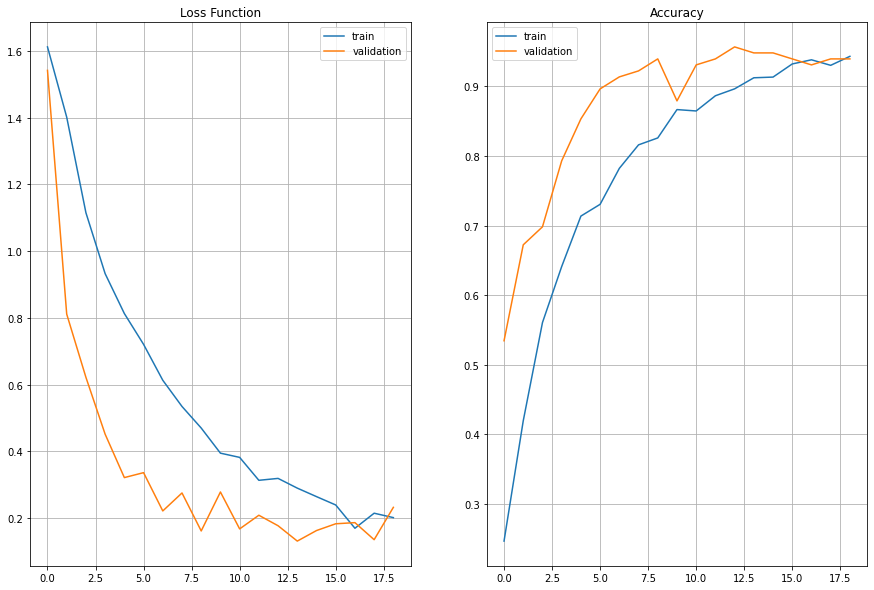

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy')
plt.legend()

plt.show()

In [20]:
results = model.evaluate(test_generated, batch_size=1)
print("Test loss, Test accuracy:", results)

16/23 [===================>..........] - ETA: 44s - loss: 0.4691 - accuracy: 0.8750

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


23/23 [==============================] - 160s 7s/step - loss: 0.4414 - accuracy: 0.8842
Test loss, Test accuracy: [0.4414140582084656, 0.8841807842254639]


In [21]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generated)

y_pred = np.argmax(y_pred, axis=1)

print(classification_report(test_generated.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  " Skipping tag %s" % (size, len(data), tag)


              precision    recall  f1-score   support

           0       0.14      0.15      0.14        73
           1       0.14      0.13      0.14        60
           2       0.20      0.21      0.20        87
           3       0.15      0.15      0.15        52
           4       0.23      0.20      0.21        82

    accuracy                           0.17       354
   macro avg       0.17      0.17      0.17       354
weighted avg       0.17      0.17      0.17       354



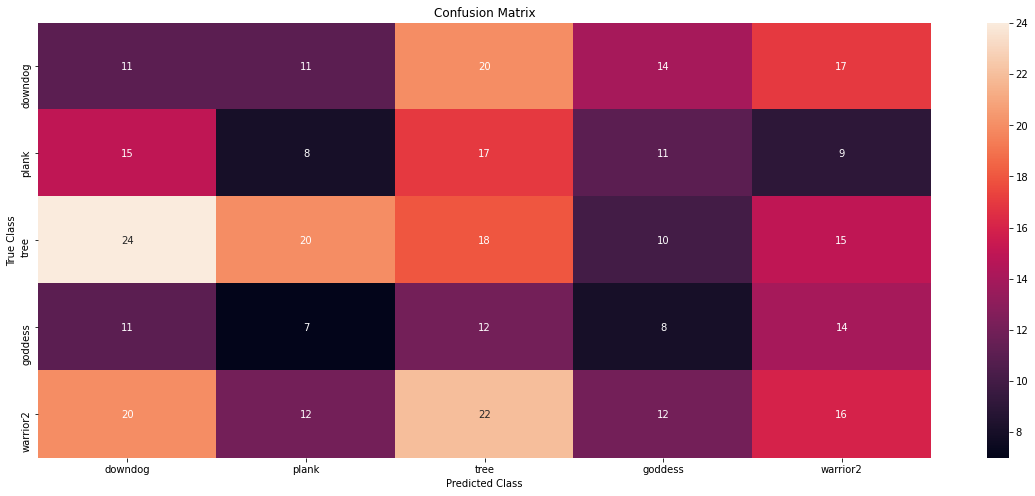

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

m = confusion_matrix(test_generated.classes, y_pred)

labels = names_classes
plt.figure(figsize=(20, 8))

heatmap = sns.heatmap(m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

[1. 0. 0. 0. 0.]


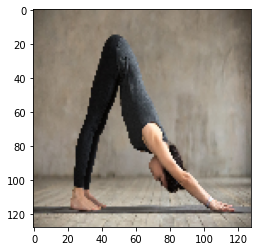

In [30]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

results = []
images = [] 

for x in os.listdir(test_path):
    count = 0
    for image_path in os.listdir(test_path + x + '/'):
       
        images.append(test_path + x + '/' + image_path)
        
        results.append(x)
        count += 1 
        if count == 2:
            break 


image = load_img(images[0], target_size=(128, 128))

input_arr = img_to_array(image)

input_arr = np.array([input_arr])  

prediction = model.predict(input_arr)

print(np.squeeze(prediction))
plt.imshow(image)

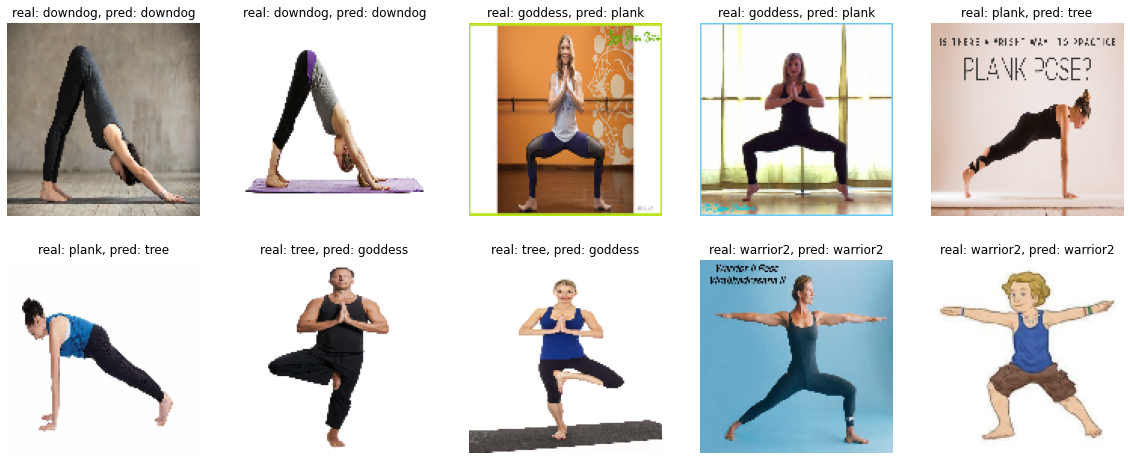

In [31]:
def list_to_label(ls):
    lis = np.squeeze(ls) 
    lis = list(lis)
    index = lis.index(1) 
    return names_classes[index]

def read_image(path, size=128):
   
    image = load_img(path, target_size=(size, size))
   
    input_arr = img_to_array(image)
   
    input_arr = np.array([input_arr])  
    
    return image, input_arr
    

plt.figure(figsize=(20,8))

for img_path, ans, i in zip(images, results, np.arange(10)):
    img, arr = read_image(img_path) 
    pred = model.predict(arr)
    plt.subplot(2,5,i+1) 
    plt.imshow(img) 
 
    plt.title(f'real: {ans}, pred: {list_to_label(pred)}')
    plt.axis('off')

plt.show()


In [32]:
model.save('Yoga-Pose-Classifier-CNN.h5')

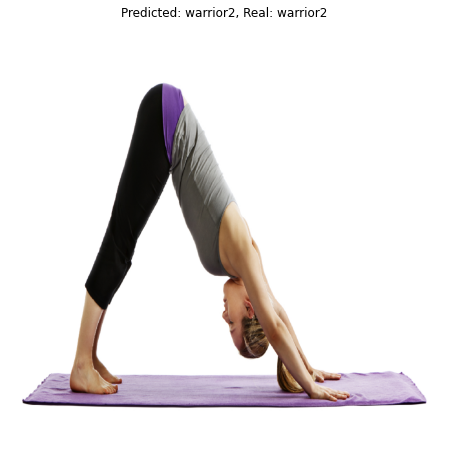

In [34]:
loaded_model = keras.models.load_model('./Yoga-Pose-Classifier-CNN.h5')

img, arr = read_image(images[1])

hd_image, nothing = read_image(images[1], size=1024)

plt.figure(figsize=(8,8))
plt.imshow(hd_image)
plt.title(f'Predicted: {list_to_label(pred)}, Real: {ans}')
plt.axis('off')
plt.show()